In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Data preparation

In [171]:
df = pd.read_csv('data.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Finding optimal number of clusters

In [173]:
x = df.iloc[:,[0,6]].values

In [174]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

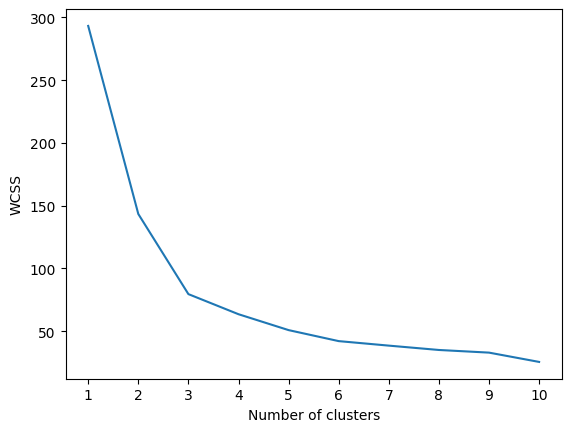

In [175]:
plt.xlabel("Number of clusters")
plt.xticks(range(1,11))
plt.ylabel("WCSS")
plt.plot(range(1, 11),wcss)

#### We can see optimal number of clusters is 3

### Showing clusters

In [176]:
clusters = 3
kmeans = KMeans(n_clusters = clusters, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(x)

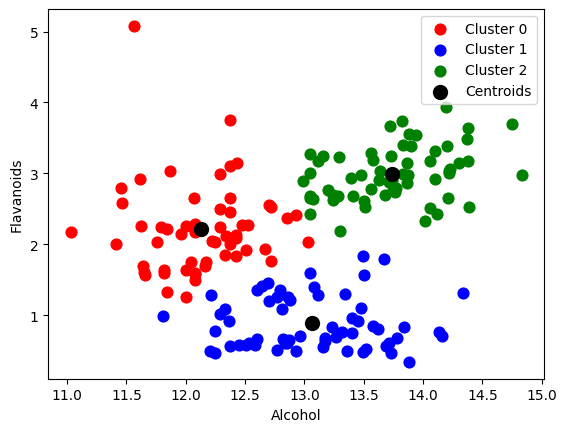

In [177]:
cluster_col = ['red','blue','green','orange','purple']
for cluster in range(0,clusters):
    plt.scatter(x[y_kmeans == cluster, 0], x[y_kmeans == cluster, 1], s = 60, c = cluster_col[cluster], label = f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Alcohol') 
plt.ylabel('Flavanoids') 
plt.legend() 

plt.show()